In [205]:
from plotter import *
import pandas as pd

In [206]:
path = "../simulation/competitive/thetas0.5/main.csv"
data = pd.read_csv(path)
KEY = "BP3"

In [207]:
# get N records, each record is the best for compare_column in M randomly selected records
def sample(data: pd.DataFrame, N, M, compare_column):
    samples = data.sample(M * N, random_state=20194230)
    indices = [samples.iloc[i*M:(i+1)*M][compare_column].idxmin() for i in range(N)]
    best_records = samples.loc[indices]

    # Reset index if needed
    best_records.reset_index(drop=True, inplace=True)   
    return best_records


In [209]:
COLUMN = f"{KEY}.RLP"
GROUPS = [1, 2, 4, 8]

In [210]:
groupp = []
groups = []
groupptxp = []
groupptxs = []
N = len(data) // max(GROUPS)
for M in GROUPS:
    best = sample(data=data, N=N, M=M, compare_column=COLUMN)
    groups.append(best[f"{KEY}.RLS"])
    groupp.append(best[COLUMN])
    groupptxp.append(best[f"{KEY}.PTXP"])
    groupptxs.append(best[f"{KEY}.PTXS"])

In [211]:
LEGENDS = [f"${c}" + r"\ \text{SU}$" for c in GROUPS]
def draw_group(data, xlabel, legend, columns):
    group = pd.concat(data, axis=1, keys=GROUPS)
    ecdfs(
        data=group, 
        columns=columns, 
        labels=legend,
        xlabel=xlabel,
        xlim=None,
        # legend_title=r"$\text{Number of SUs}$"
    )
    return group.describe()

,1,2,4,8
count,4.999900e+04,4.999900e+04,4.999900e+04,4.999900e+04
mean,2.874709e-01,1.157266e-01,2.356422e-02,1.553811e-03
std,3.200518e-01,2.152697e-01,8.609344e-02,1.489864e-02
min,-2.046635e-43,-1.328885e-38,-6.720824e-29,-5.211754e-27
25%,1.508536e-04,3.885039e-12,2.760355e-80,0.000000e+00
50%,1.090552e-01,1.072748e-03,1.116015e-08,1.311623e-45
75%,6.367786e-01,1.106734e-01,1.030660e-03,7.590626e-09
max,8.000000e-01,8.000000e-01,7.976247e-01,7.249974e-01


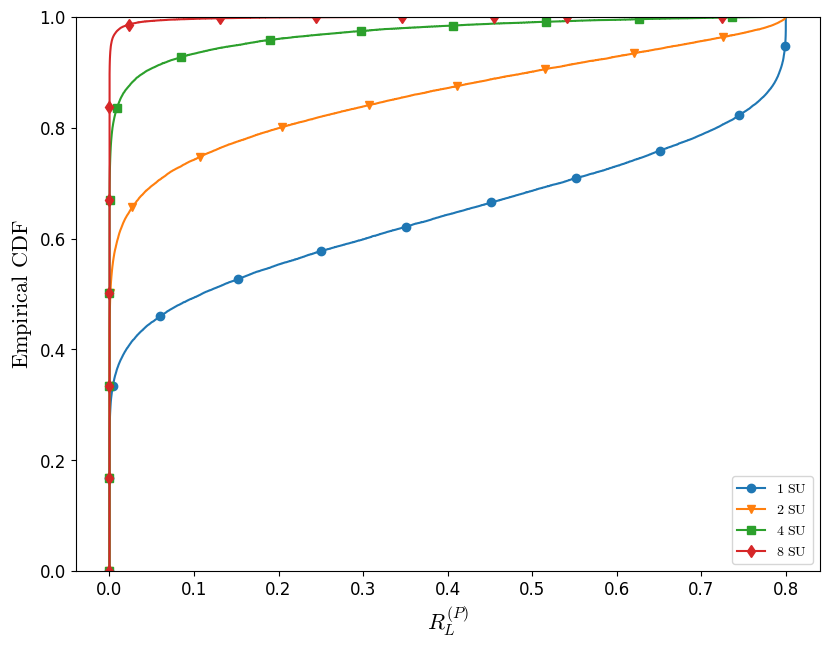

In [212]:
draw_group(groupp, r"$R_L^{(P)}$", LEGENDS, GROUPS)

,1,2,4,8
count,49999.000000,49999.000000,49999.000000,49999.000000
mean,0.232295,0.237139,0.235731,0.233449
std,0.207724,0.203697,0.198791,0.193701
min,0.000000,0.000000,0.000000,0.000000
25%,0.006950,0.011388,0.013503,0.014753
50%,0.200339,0.221631,0.228313,0.233906
75%,0.480630,0.468550,0.448964,0.433232
max,0.500000,0.500000,0.500000,0.500000


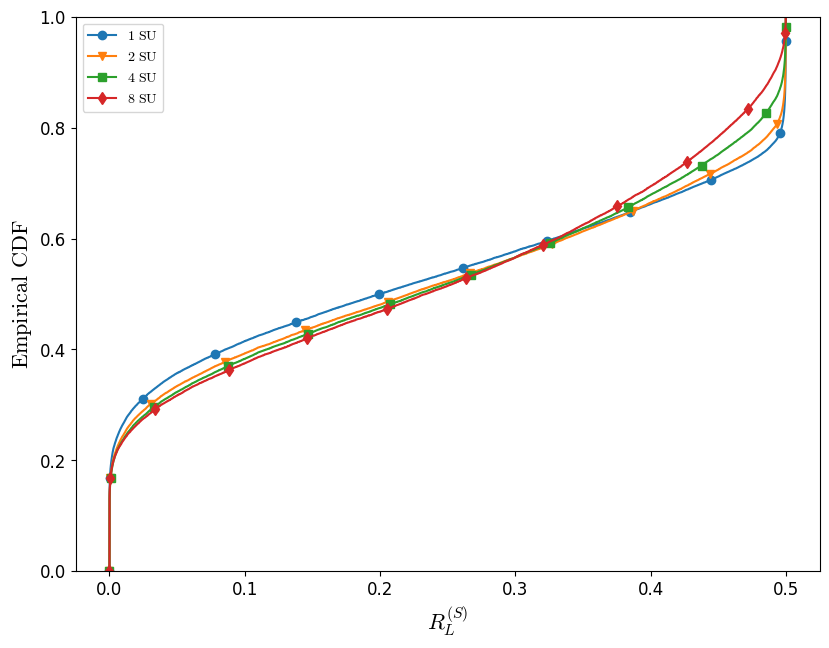

In [213]:
draw_group(groups, r"$R_L^{(S)}$", LEGENDS, GROUPS)

,1,2,4,8
count,49999.000000,49999.000000,49999.000000,49999.000000
mean,0.506251,0.533056,0.566299,0.609452
std,0.149362,0.154619,0.164081,0.178478
min,0.260109,0.260122,0.260122,0.260220
25%,0.450491,0.481996,0.497709,0.500613
50%,0.494554,0.499554,0.501464,0.508521
75%,0.501224,0.506776,0.531406,0.675974
max,1.000000,1.000000,1.000000,1.000000


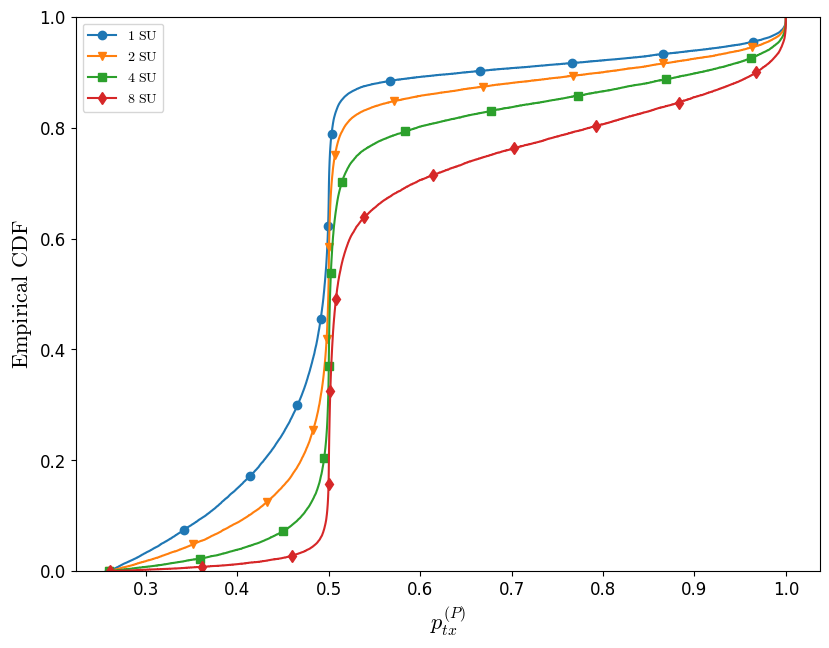

In [214]:
draw_group(groupptxp, r"$p_{tx}^{(P)}$", LEGENDS, GROUPS)

,1,2,4,8
count,49999.000000,49999.000000,49999.000000,49999.000000
mean,0.646288,0.634836,0.628308,0.632112
std,0.222570,0.223645,0.220419,0.216086
min,0.260174,0.260353,0.260278,0.260344
25%,0.485603,0.473686,0.468645,0.475958
50%,0.556479,0.547348,0.548824,0.560524
75%,0.874883,0.855943,0.831496,0.825796
max,1.000000,1.000000,1.000000,1.000000


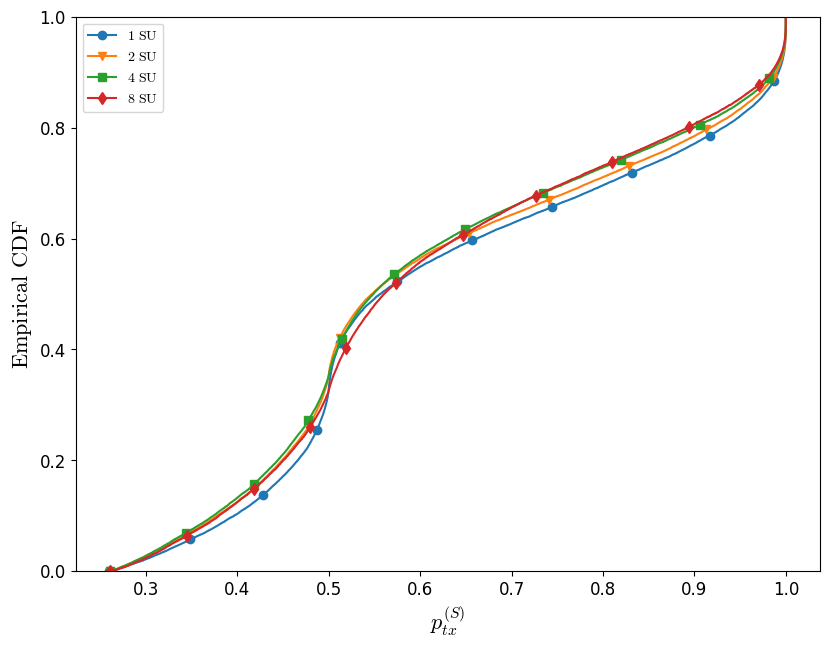

In [215]:
draw_group(groupptxs, r"$p_{tx}^{(S)}$", LEGENDS, GROUPS)